### **Introduction to t-SNE**
t-Distributed Stochastic Neighbor Embedding (**t-SNE**) is a **non-linear dimensionality reduction** technique primarily used for **visualizing high-dimensional data**. It helps project complex datasets onto **2D or 3D space** while preserving the local structure and relationships between points.

Developed by **Laurens van der Maaten and Geoffrey Hinton**, t-SNE improves upon earlier techniques like PCA by focusing on capturing local patterns rather than just global variance. It achieves this by converting similarities between data points into **probabilities** and minimizing divergence between high-dimensional and low-dimensional distributions.

### **How t-SNE Works**
1. **Compute Pairwise Similarities:**  
   - t-SNE calculates the probability that two points are **neighbors** in high-dimensional space using a Gaussian distribution.
2. **Map to Low-Dimensional Space:**  
   - It randomly initializes points in a lower-dimensional space (2D/3D) and assigns probabilities using a **Student’s t-distribution**.
3. **Minimize Divergence:**  
   - It adjusts point positions iteratively to minimize **Kullback-Leibler divergence (KL-divergence)** between the high- and low-dimensional distributions.
4. **Visual Representation:**  
   - The final 2D or 3D visualization shows **clusters and patterns**, making it useful for **exploratory data analysis**.

---

#### **When to Use t-SNE**
You should use t-SNE when:

 - You need to **visualize high-dimensional data** in **2D or 3D**.  
 - You want to understand **clustering patterns** without prior labels.  
 - Your data is **non-linearly separable**, where PCA might fail.  
 - You need an **interpretative view** of deep learning feature embeddings.  

---

#### **Limitations of t-SNE**
**Computationally Expensive** – Not suitable for very large datasets.  
**Does Not Preserve Global Structure** – Focuses on local relationships.  
**Random Initialization** – Different runs may give **slightly different results**.  
**Hard to Interpret Distances** – The absolute distances in t-SNE plots are not meaningful.  

#### **Alternatives to t-SNE**
- **UMAP (Uniform Manifold Approximation and Projection)** – Faster and preserves global structure better.  
- **PCA (Principal Component Analysis)** – Works well when data has a strong linear structure.  



In [1]:
%pwd

'/home/sarath_kumar/ImagoAI/notebook'

In [ ]:
# import os
# os.chdir("../")
# %pwd

'/home/sarath_kumar/ImagoAI'

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load dataset
df = pd.read_csv("data/TASK-ML-INTERN.csv")  # Replace with actual dataset
df.drop("hsi_id",axis=1,inplace = True)


# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate features and target
X = df.iloc[:, :-1].values  # All except last column
y = df.iloc[:, -1].values   # Last column (target variable)

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)


# Train-Test Split (80-20)
# X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)


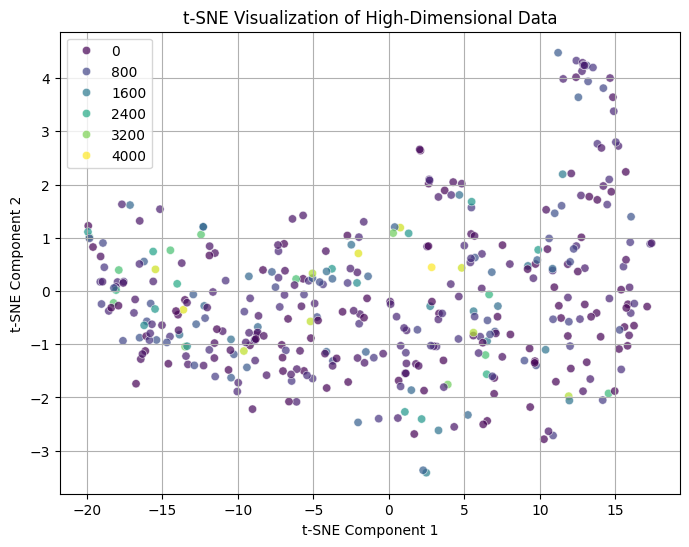

In [5]:
# Plot the t-SNE representation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of High-Dimensional Data")
plt.legend()
plt.grid()
plt.show()

This **t-SNE visualization** represents high-dimensional data in **2D space**, preserving local relationships. The **clusters and color variations** suggest patterns in the data, with some regions showing denser groupings. Overlapping points indicate potential similarities or weak separability between groups. This helps in understanding **hidden structures** and relationships in complex datasets.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_tsne_3d(X, y, perplexity=30, random_state=42):
    """
    Applies t-SNE on high-dimensional dataset and plots a 3D scatter plot.

    Parameters:
    - X: Feature matrix (high-dimensional data)
    - y: Target variable (for coloring points)
    - perplexity: t-SNE perplexity parameter (default = 30)
    - random_state: Random seed for reproducibility (default = 42)
    """

    # Apply t-SNE transformation to 3 components
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=random_state)
    X_tsne = tsne.fit_transform(X)

    # Plot the 3D t-SNE representation
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap="viridis", alpha=0.7)
    
    # Set labels and title
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.set_zlabel("t-SNE Component 3")
    ax.set_title("3D t-SNE Visualization of High-Dimensional Data")

    # Add legend
    legend1 = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
    legend1.set_label("Target Variable")

    plt.show()


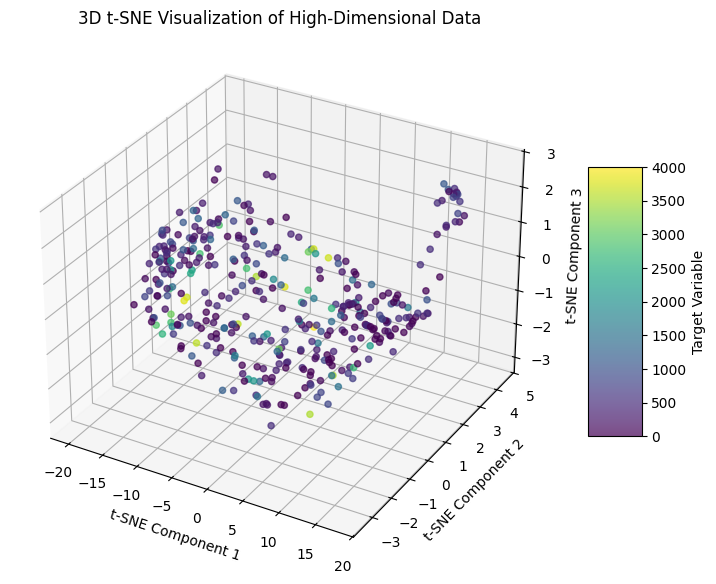

In [7]:
# Call the function to plot 3D t-SNE
plot_tsne_3d(X, y)


This **3D t-SNE visualization** represents high-dimensional data projected into **three components**, with **color encoding the target variable**. Clustering patterns indicate **group similarities**, while the color gradient shows variations in the target values. The spread of points suggests relationships between features, helping in **understanding complex structures** in the data.

In [ ]:
import matplotlib.animation as animation

def plot_tsne_4d(X, y, perplexity=30, random_state=42, animate=True):
    """
    Applies t-SNE on high-dimensional dataset and plots a 3D scatter plot with color & marker size as 4th dimension.

    Parameters:
    - X: Feature matrix (high-dimensional data)
    - y: Target variable (for coloring points)
    - perplexity: t-SNE perplexity parameter (default = 30)
    - random_state: Random seed for reproducibility (default = 42)
    - animate: Whether to rotate the plot for better perception (default = True)
    """

    # Apply t-SNE transformation to 3 components
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=random_state)
    X_tsne = tsne.fit_transform(X)

    # Extract the first 3 components for 3D plot
    x_vals, y_vals, z_vals = X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2]
    color_vals = y  # Encode target variable as color
    size_vals = np.abs(X_tsne[:, 2]) * 20  # Encode 4th dimension as marker size

    # Create 3D scatter plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x_vals, y_vals, z_vals, c=color_vals, s=size_vals, cmap="plasma", alpha=0.8)

    # Set labels and title
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    ax.set_zlabel("t-SNE Component 3")
    ax.set_title("Simulated 4D t-SNE (Color & Size Encodes 4th Dim)")

    # Add color bar for target variable
    legend1 = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
    legend1.set_label("Target Variable (Color Encodes Category)")

    # Animation: Rotate the 3D plot
    if animate:
        def rotate(angle):
            ax.view_init(elev=20, azim=angle)

        ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50)
        # ani.save("tsne_4d_animation.gif", writer="pillow")  # Saves animation as a GIF
        plt.show()
    else:
        plt.show()


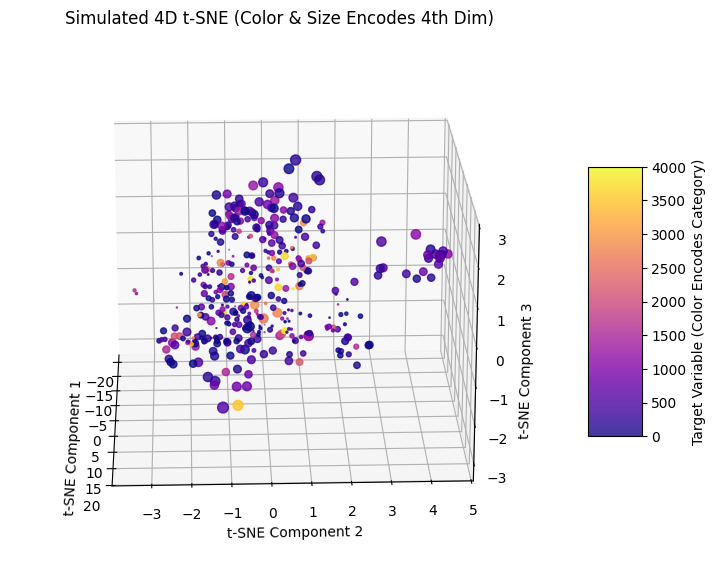

In [13]:
# Call the function to plot animated 4D t-SNE
plot_tsne_4d(X, y, animate=True)


This **4D t-SNE visualization** reduces high-dimensional data into **3D space**, with **color and size representing the 4th dimension** (target variable). The clustering of points suggests **hidden patterns**, where **similar data points are grouped**. Color gradients indicate variations in the encoded category, helping in understanding **complex relationships** in the dataset.